### Step 1 Install the Quandl library and register for a Quandl account as described in the Exercise.

conda install quandl

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [7]:
# Configure API key 

quandl.ApiConfig.api_key = 'cetY7FNRQg1giy6epNBh'

### Step 2 Find a data set to work and import it into your Jupyter notebook.

In [9]:
# Couldnt find data from Indian restaurants in the recommended website
# Data was imported from Kaggle

df = pd.read_csv(r'C:\Users\PC\Documents\Zomato Dataset.csv', index_col = False)

### To follow the exercise was imported a corresponding DF that represents the stock value from Zomato (Food bussinness placed in India) since 2021.

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


Spotting Missing values

In [19]:
null_values=df.isnull().sum()

In [21]:
print(null_values[null_values > 0])

Series([], dtype: int64)


In [23]:
df.shape

(698, 7)

Renaming Columns

In [26]:
df.rename(columns = {'Close' : 'Stock Value'}, inplace = True)

In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Stock Value', 'Adj Close', 'Volume'], dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         698 non-null    object 
 1   Open         698 non-null    float64
 2   High         698 non-null    float64
 3   Low          698 non-null    float64
 4   Stock Value  698 non-null    float64
 5   Adj Close    698 non-null    float64
 6   Volume       698 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.3+ KB


### Step 3 Make a subset of your data set if necessary.

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.set_index('Date', inplace=True)

In [36]:
df_subset = df[['Stock Value']]

In [38]:
print(df_subset.head())

            Stock Value
Date                   
2021-07-23   126.000000
2021-07-26   140.649994
2021-07-27   132.899994
2021-07-28   131.199997
2021-07-29   141.550003


### Step 4 Create a line chart of your data

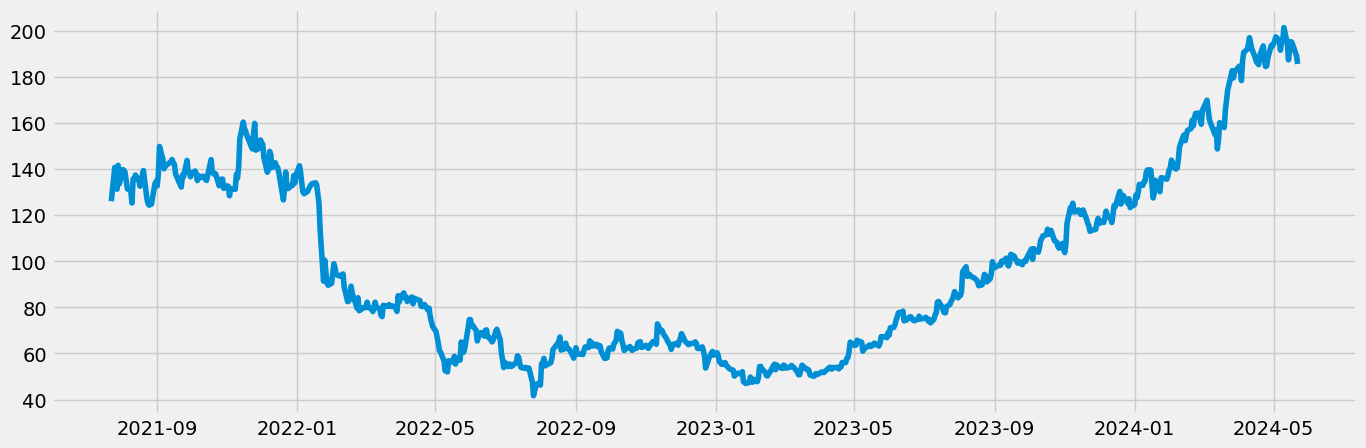

In [42]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_subset)

In [47]:
df_monthly = df_subset.resample('M').mean()

In [49]:
print(df_monthly.head())

            Stock Value
Date                   
2021-07-31   134.299998
2021-08-31   132.614285
2021-09-30   139.445239
2021-10-31   136.682500
2021-11-30   145.810000


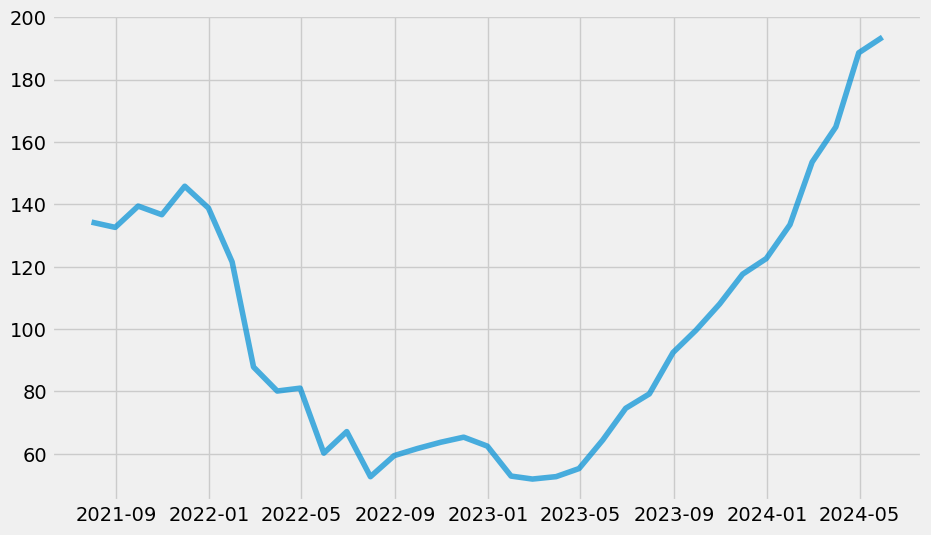

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Stock Value'], label='Original', alpha=0.7)

### Step 5 Decompose the data’s components. 

Analyze the results from the plot in a markdown cell.

In [53]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_monthly, model='additive')

In [55]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

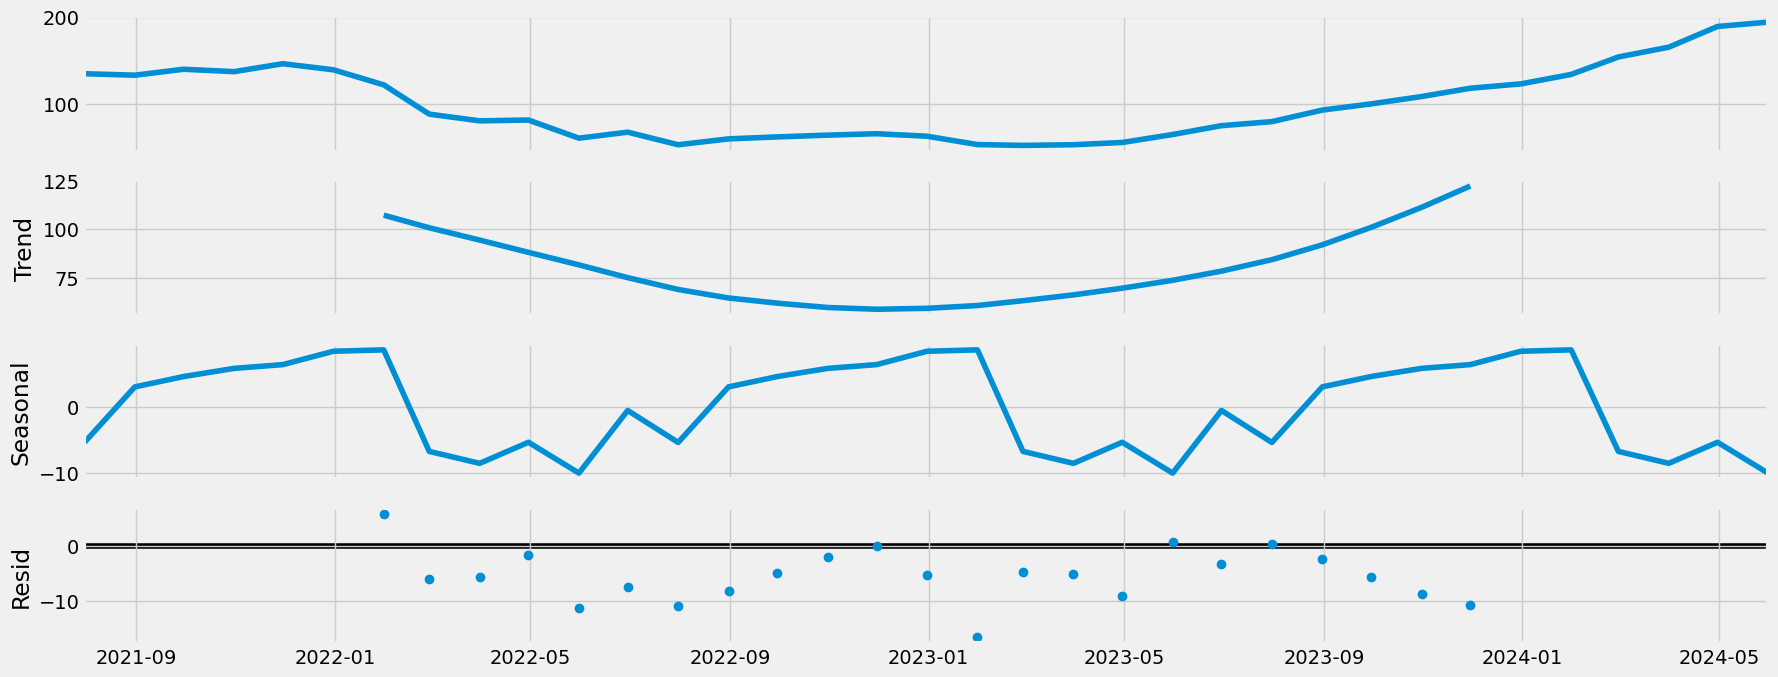

In [57]:
# Plot the separate components

decomposition.plot()
plt.show()

### Step 6 Conduct a Dickey-Fuller test to check for stationarity.

Interpret the results in a markdown cell and reference your null hypothesis.

In [60]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_monthly['Stock Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.852485
p-value                         0.803217
Number of Lags Used             9.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


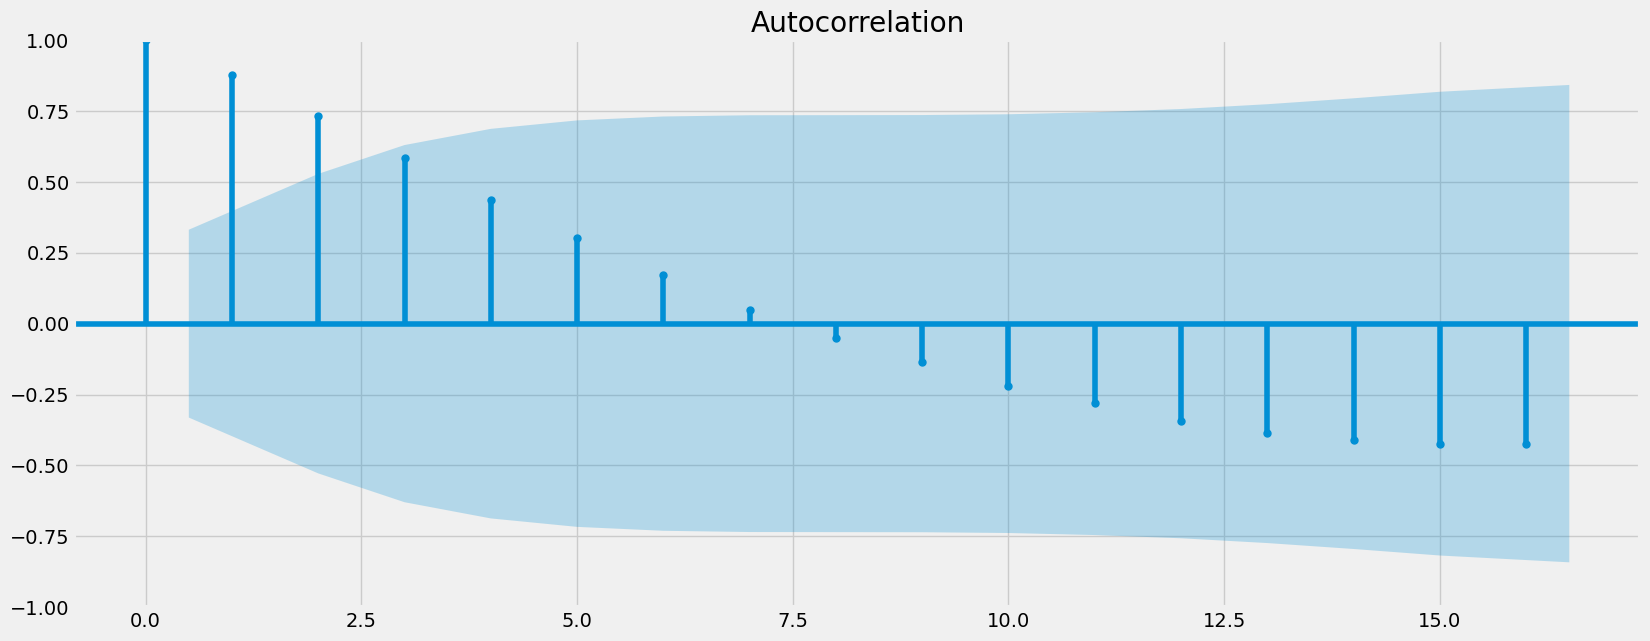

In [62]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_monthly)
plt.show()

### Step 7 If your data isn’t stationary, conduct a round of differencing on it and repeat step 6

In [65]:
df_diff = df_monthly - df_monthly.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [67]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [69]:
df_diff.head()

,Stock Value
Date,
2021-08-31,-1.685713
2021-09-30,6.830954
2021-10-31,-2.762739
2021-11-30,9.127499
2021-12-31,-6.999131


In [71]:
df_diff.columns

Index(['Stock Value'], dtype='object')

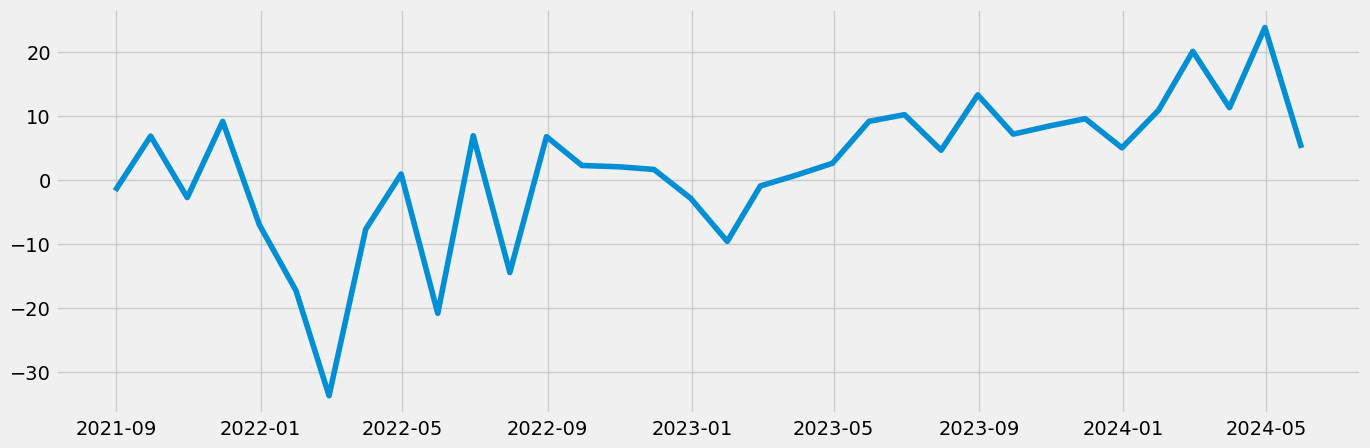

In [73]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [75]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.606087
p-value                         0.869601
Number of Lags Used            10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


### Step 8 If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [77]:
df_diff1 = df_diff - df_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [79]:
df_diff1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [81]:
dickey_fuller(df_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.888735
p-value                         0.000037
Number of Lags Used            10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


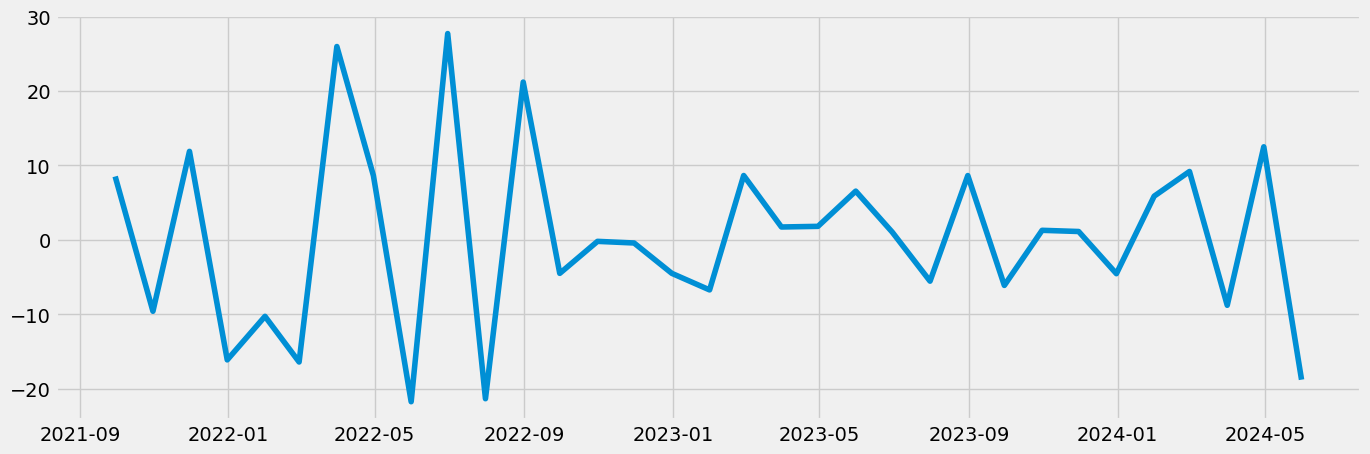

In [101]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff1)

### Step 9 Check your data’s autocorrelations.

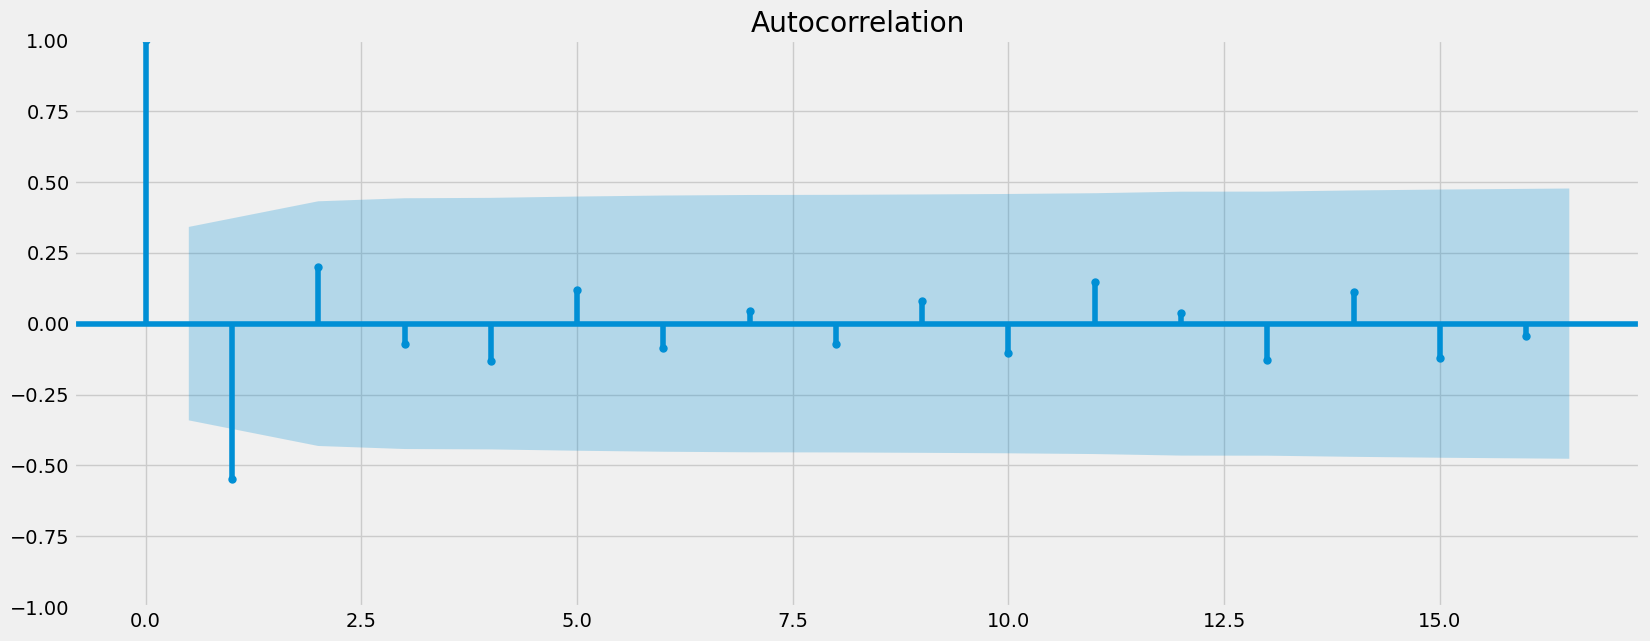

In [103]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_diff1)
plt.show()